In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import GPy
from IPython.display import display
plt.rcParams['figure.figsize'] = (16.0, 12.0)
%matplotlib inline

In [2]:
import sys
sys.path.append("../")

In [3]:
from vidsummarai.models import video
from vidsummarai.helpers.load_data import get_video_objects

In [4]:
video_info_path = "../data/data/ydata-tvsum50-info.tsv"
anno_path = "../data/data/ydata-tvsum50-anno.tsv"

In [5]:
videos = get_video_objects(video_info_path, anno_path)

In [14]:
video_number = 3

In [15]:
print videos[video_number]


        Video Title: A Year of Beekeeping
        Video Id: uGu_10sucQo
        Video Url: https://www.youtube.com/watch?v=uGu_10sucQo
        Video Duration: 167
        Video Genre: BK
        


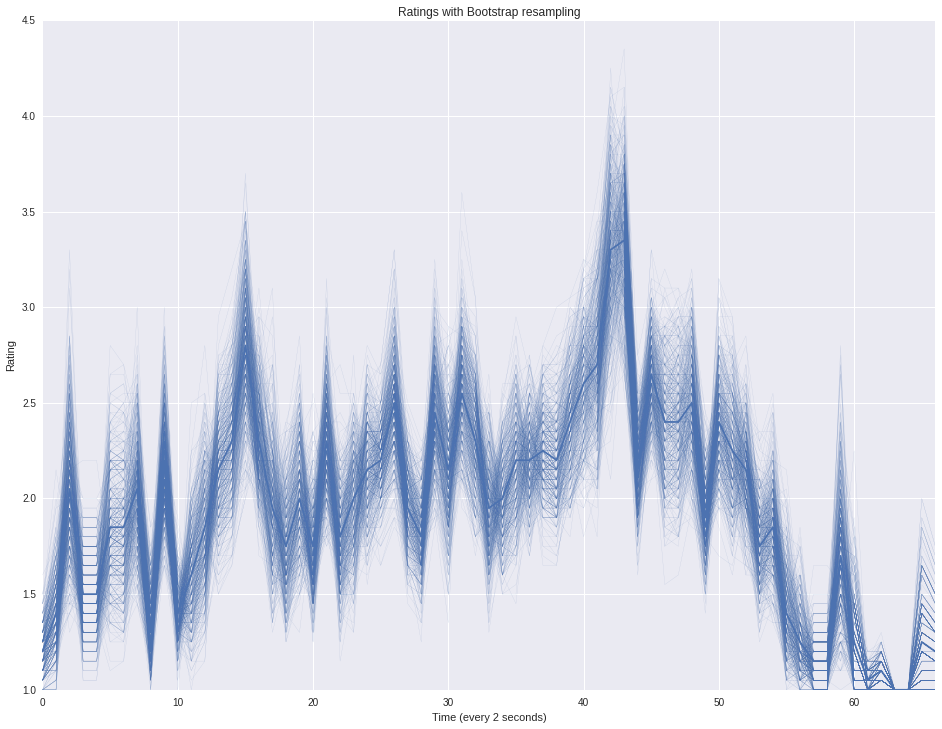

In [16]:
videos[video_number].plot_samples()

### Gaussian Process Regression

__RBF Kernel__

Here we attempt to use an RBF Kernel in our GP model.

lengthscale controls how many data points (on the x axis) we want our RBF to encorporate. Users annotate every 2 seconds, so 60 would represent 60 frames or 2 seconds. Increasing the lengthscale smooths out the Gaussian Process.

In [17]:
videos[video_number].fit_gaussian_process()

{'dataplot': {'dataplot': [<matplotlib.lines.Line2D at 0x7f9b55a38490>]},
 'gpplot': [[<matplotlib.lines.Line2D at 0x7f9b55c4d590>],
  [<matplotlib.lines.Line2D at 0x7f9b55c4dd50>]]}

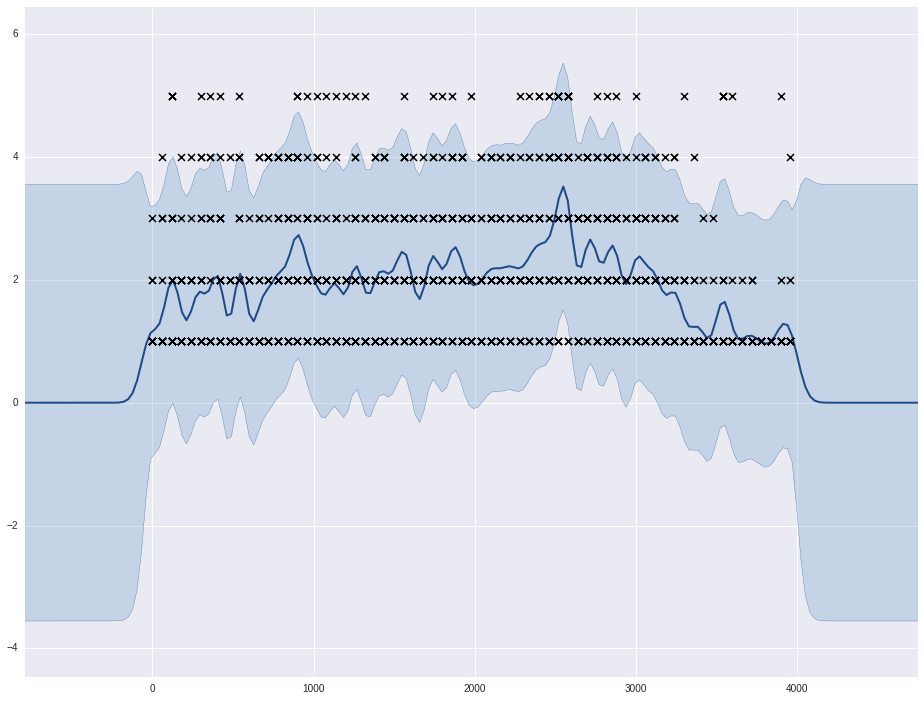

In [18]:
plt.rcParams['figure.figsize'] = (16.0, 12.0)
videos[video_number].plot_gaussian_process()

__Optimize Params of GP__

We can use the built in functions of the GPy library to find the optimal value of variance and lengthscale for our GP.

In [19]:
videos[video_number].gp.optimize(messages=True)

{'dataplot': {'dataplot': [<matplotlib.lines.Line2D at 0x7f9b55bdf790>]},
 'gpplot': [[<matplotlib.lines.Line2D at 0x7f9b55cc3f10>],
  [<matplotlib.lines.Line2D at 0x7f9b55bd3c90>]]}

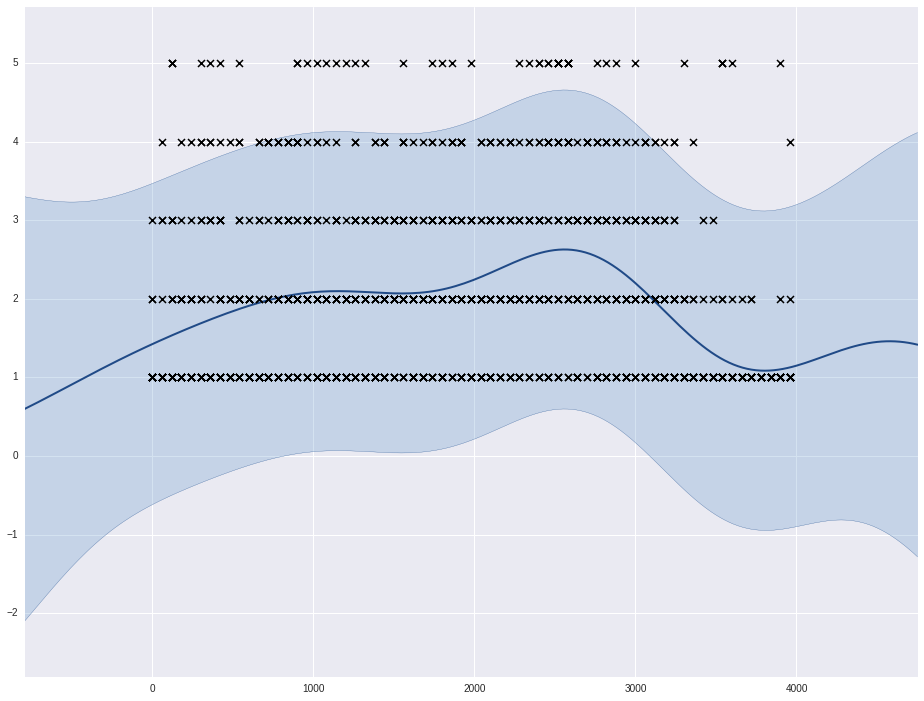

In [20]:
videos[video_number].plot_gaussian_process()

In [21]:
print videos[video_number].gp


Name                              : GP regression
Log-likelihood                    : -1962.184744
Number of Parameters              : 3
Number of Optimization Parameters : 3
Updates                           : True
Parameters:
  GP_regression.           |      Value      |  Constraint  |  Prior  |  Tied to
  rbf.variance             |  2.26605074613  |     +ve      |         |         
  rbf.lengthscale          |  841.370591343  |     +ve      |         |         
  Gaussian_noise.variance  |  1.06745344672  |     +ve      |         |         
